# **Astrophysical Computations & Algorithms**
## *TA Week 15*

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize
import matplotlib.patches as patches

## HW20
<img src='HW20.png' width='600'>

Text(0, 0.5, '$\\rho$')

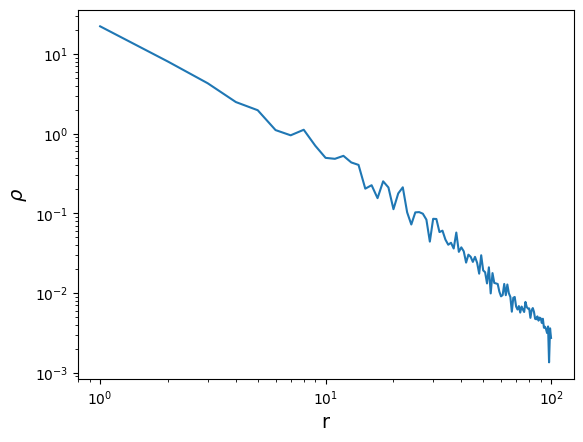

In [118]:
halo = pd.read_csv('halo.dat', names=['r', 'rho', 'rho_err'], sep='\s+')
plt.loglog(halo['r'], halo['rho'])
plt.xlabel('r', fontsize=14); plt.ylabel(r'$\rho$', fontsize=14)

<img src='uncertainty.png' width='400'>

<img src='hessian.png' width='400'>

### SIS profile

<img src='sis.png' width='400'>

### NFW profile

<img src='nfw.png' width='400'>

### `scipy.optimize.minimize()`

Downhill Simplex : `method='Nelder-Mead'`

Powell : `method='Powell'`

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

- Simple usage

In [119]:
# objective function
def objective(x):
    return (x - 3)**2

# initial condition
x0 = 0

# Optimization
result = minimize(fun=objective, x0=x0)

print("x_min:", result.x)
print("f(x_min):", result.fun)

x_min: [2.99999998]
f(x_min): 2.5388963550532293e-16


- Example (HW18)

In [120]:
from matplotlib.colors import LogNorm
import matplotlib.patches as patches

In [121]:
df = pd.read_csv('xy.dat', sep='\s+', names=['x','y','y_err'])
x = df['x'].values
y = df['y'].values
y_err = df['y_err'].values

x_min: [1.99395207 0.37710013]
f(x_min): 7.20211029162941


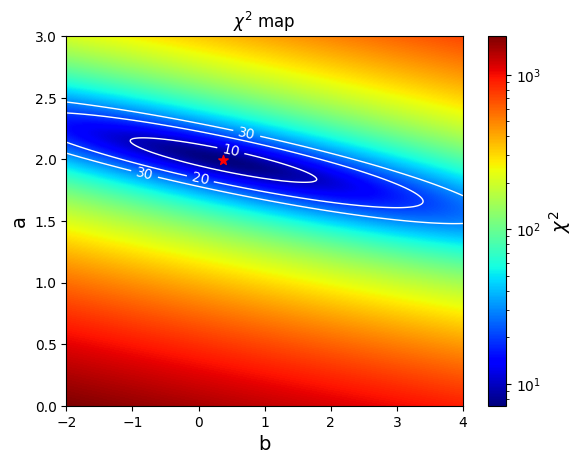

In [124]:
X, Y = np.meshgrid(np.linspace(-2, 4, 300), np.linspace(0, 3, 300))
z = np.sum(((y[:, np.newaxis, np.newaxis]-X-Y*x[:, np.newaxis, np.newaxis])/y_err[:, np.newaxis, np.newaxis])**2, axis=0)
plt.imshow(z, norm=LogNorm(), extent=[-2, 4, 0, 3], aspect='auto', origin='lower', cmap='jet')
plt.xlabel('b', fontsize=14); plt.ylabel('a', fontsize=14)
plt.title(r'$\chi^2$ map')
cbar = plt.colorbar()
cbar.set_label(r'$\chi^2$', fontsize=14)

#----------------scipy.optimize.minimize() Usage---------------------------------------------
def chi2(params, x=x, y=y, y_err=y_err):
    a, b  = params
    return np.sum(((y-b-a*x)/y_err)**2)

x0 = [2,1]
result = minimize(fun=chi2, x0=x0, method='Nelder-Mead')

print("x_min:", result.x)
print("f(x_min):", result.fun)

plt.scatter(result.x[1], result.x[0], marker='*', c='r', s=50)

#----------------------plt.contour() usage---------------------------------------

# Levels of contour
# levels = np.logspace(1,3,3)
levels = np.linspace(10,30,3)

# Draw contour
cs = plt.contour(X, Y, z, levels=levels, colors='white',linewidths=1)

# If you want to add label
plt.clabel(cs, inline=True, fontsize=10, fmt='%.0f')

plt.show()

## HW21
<img src='HW21.png' width='600'>

## HW22
<img src='HW22.png' width='600'>

## *TA Week 16*
---

## HW23
<img src='HW23.png' width='600'>

`scipy.integrate.romb()`

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.romb.html

In [89]:
from scipy.integrate import romb

In [126]:
x = np.linspace(0, np.pi, 2**6+1) # 2^k + 1
y = np.sin(x)
dx = x[1] - x[0]

I = romb(y, dx=dx)

print(f"romberg 적분 결과: {I:.6f}")

romberg 적분 결과: 2.000000
